# More comparison between time model and distance model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import json
import space as sp
from data_extracter import json_extracter
import pandas as pd

data,events=json_extracter('data/game1.json')

## Pressure evolution
We look at the pressure exerced by the closest defender of on player. For the distance model, the pressure is defined by the distance between the player and the closest defender. Then, for the time model, the pressure is defined by the time that the closest defender needs to join player's position. 

We are going to compare these two types of pressure (distance pressure and time pressure).

In [2]:
def distance_closest_defender(a,mom_infos,defensive_team):
    defenders=mom_infos['defensive_team']
    dmin=np.inf
    for player in defenders.keys():
        d=sp.distance(defenders[player]['xy'],a)
        if d<dmin:
            dmin=d
    

## Court evolution

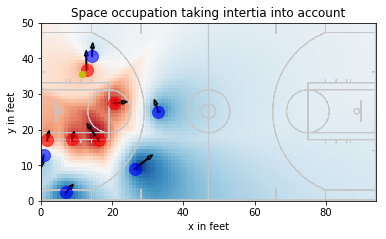

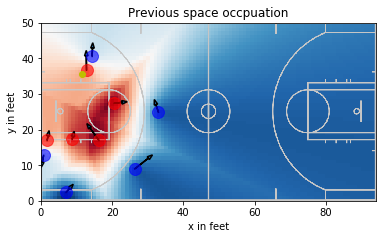

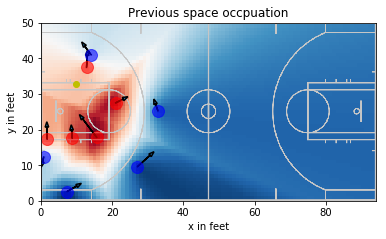

In [5]:
plt.figure(1)
plt.title('Space occupation taking intertia into account')
sp.print_court_teams_occupation_inertia(events,0,115)
plt.figure(2)
plt.title('Previous space occpuation')
sp.print_court_teams_occupation(events,0,115,value=True)
plt.figure(3)
plt.title('Previous space occpuation')
sp.print_court_teams_occupation(events,0,120,value=True)